# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [241]:
import matplotlib.pyplot as plt

In [242]:
import spacy
spacy.__version__

'3.5.2'

In [243]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [244]:
!python3 -m spacy download pt_core_news_sm

2023-05-27 19:38:11.161892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 98.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [245]:
import pt_core_news_sm

In [246]:
nlp = pt_core_news_sm.load()
nlp

In [247]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# Etapa 2: Carregamento da base de dados

In [248]:
base_dados = pd.read_csv('sentimentos.csv', encoding = 'utf-8')

In [249]:
base_dados.shape

(7357, 7)

In [250]:
base_dados.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,"The app has improved significantly, sometimes ...",Joel Hernández,4,0,0,1,sentimentos
1,"Lately, with every update the app gets worse: ...",Lucas Santos,3,0,1,0,sentimentos
2,I haven't been able to access the App. It won'...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,I have 1 and a half years with this card and I...,Ramón Quijas,1,1,0,0,sentimentos
4,Very helpful app. The card arrived very fast a...,Emmanuelle Silva,5,0,0,1,sentimentos


In [251]:
base_dados.tail()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
7352,Toda a ideia original do Nubank de simplificar...,Leandro C.,1,1,0,0,sentimentos
7353,"Cada vez peor, cuando llegó fui uno de los pri...",Haguen Alferogh,1,1,0,0,sentimentos
7354,"É um ótimo app, o melhor controle de cartão de...",A Google user,4,0,0,1,sentimentos
7355,"Era bom, hoje em dia so passo vergonha. App fu...",Arthwr Ozaki,5,0,0,1,sentimentos
7356,Falta de vontade de quem te atende de enviar u...,Fabio A,1,1,0,0,sentimentos


<Axes: xlabel='Rating', ylabel='count'>

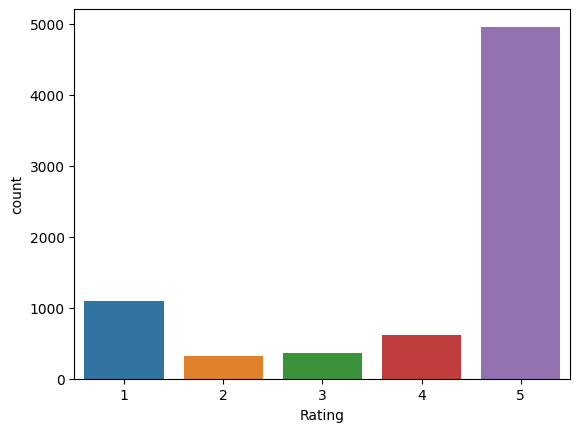

In [252]:
base_dados['Rating'] = base_dados['Rating'].round()
sns.countplot(x='Rating', data=base_dados)

# Etapa 3: Função para pré-processamento dos textos

In [253]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [254]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [255]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [256]:
len(stop_words)

416

In [257]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [258]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = nlp(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [259]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [260]:
base_dados.head(10)

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,"The app has improved significantly, sometimes ...",Joel Hernández,4,0,0,1,sentimentos
1,"Lately, with every update the app gets worse: ...",Lucas Santos,3,0,1,0,sentimentos
2,I haven't been able to access the App. It won'...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,I have 1 and a half years with this card and I...,Ramón Quijas,1,1,0,0,sentimentos
4,Very helpful app. The card arrived very fast a...,Emmanuelle Silva,5,0,0,1,sentimentos
5,"It is failing lately, it lags and never opens,...",Sandra Villanueva,3,0,1,0,sentimentos
6,It used to be a good app. Now the UX is bloate...,Raul Kist,2,1,0,0,sentimentos
7,"Locked out of the app, can't pass by the finge...",Danilo de Queiroz,1,1,0,0,sentimentos
8,"Unbelievable, I just spent hours on the chat, ...",Monica V. Freitas,1,1,0,0,sentimentos
9,"It is an amazing and simple, easy-to-use app. ...",Rafa S,5,0,0,1,sentimentos


In [261]:
base_dados['Review'] = base_dados['Review'].apply(preprocessamento)

In [262]:
base_dados.head(10)

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,the app has improved significantly sometime it...,Joel Hernández,4,0,0,1,sentimentos
1,lately with every update the app gets Worse ev...,Lucas Santos,3,0,1,0,sentimentos
2,i Haven't been Able to access the app it won't...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,i have and Half years With thi card and i have...,Ramón Quijas,1,1,0,0,sentimentos
4,very helpful app the card arrived very fast at...,Emmanuelle Silva,5,0,0,1,sentimentos
5,it is Failing lately it lags and never opem i ...,Sandra Villanueva,3,0,1,0,sentimentos
6,it used to be good app now the ux is Bloated W...,Raul Kist,2,1,0,0,sentimentos
7,locked out of the app can't pass by the finger...,Danilo de Queiroz,1,1,0,0,sentimentos
8,unbelievable i just spent hours on the chat ta...,Monica V. Freitas,1,1,0,0,sentimentos
9,it is an amazing and simple easy-to-use app th...,Rafa S,5,0,0,1,sentimentos


### Tratamento da classe

In [263]:
exemplo_base_dados = [["este trabalho é agradável", {"Negative": True, "Neutral": False, "Positive": False}],
                      ["este lugar continua assustador", {"Negative": False, "Neutral": True, "Positive": False}]]

In [264]:
type(exemplo_base_dados)

list

In [265]:
exemplo_base_dados[0]

['este trabalho é agradável',
 {'Negative': True, 'Neutral': False, 'Positive': False}]

In [266]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [267]:
exemplo_base_dados[0][1]

{'Negative': True, 'Neutral': False, 'Positive': False}

In [268]:
type(exemplo_base_dados[0][1])

dict

In [269]:
base_dados_final = []
for texto, negative, neutral, positive in zip(base_dados['Review'], base_dados['NegativeRating'], base_dados['NeutralRatings'], base_dados['PositiveFeeling']):
  #print(texto, emocao)
  if negative == 1:
    dic = ({"Negative": True, "Neutral": False, "Positive": False})
  elif neutral == 'medo':
    dic = ({"Negative": False, "Neutral": True, "Positive": False})
  else: 
    dic = ({"Negative": False, "Neutral": False, "Positive": True})  

  base_dados_final.append([texto, dic.copy()])

In [270]:
len(base_dados_final)

7357

In [271]:
base_dados_final[0]

["the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado",
 {'Negative': False, 'Neutral': False, 'Positive': True}]

In [272]:
base_dados_final[0][0]

"the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado"

In [273]:
base_dados_final[0][1]

{'Negative': False, 'Neutral': False, 'Positive': True}

In [274]:
type(base_dados_final[0][1])

dict

In [275]:
base_dados_final

[["the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado",
  {'Negative': False, 'Neutral': False, 'Positive': True}],
 ["lately with every update the app gets Worse everytime that i want to Make payment i need to Confirm my identity the pig Savings money doesn't get interest anymore sincer the money need to stay one Month and every payment pick older money first the saving boxe canr only be withdrawn in business day horrible if you have an emergency outsidir ther and it is pushed emergency savings Loading time feel even longer With More Menu buttom and soft resets often during use",
  {'Negative': False, 'Neutral': False, 'Positive': True}],
 ["i Haven't been Able to access the app it won't allow to switch from brazil to mexico i don't Speak portugué so that suck i've uninstalled and re-download several time since that 's what i Was told to de o by customer service did

# Etapa 5: Criação do classificador

In [276]:
import spacy

In [277]:
spacy.require_gpu()

True

In [278]:
from spacy.training import Example

In [279]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("Negative")
textcat.add_label("Neutral")
textcat.add_label("Positive")
historico = []

In [280]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 735):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(epoca, losses)
    historico.append(losses)

0 {'textcat': 1.7603048160672188}
100 {'textcat': 0.03032589538849642}
200 {'textcat': 0.0301390756649198}
300 {'textcat': 0.03013948061961302}
400 {'textcat': 0.02976343572663609}
500 {'textcat': 0.03481130884028971}
600 {'textcat': 0.029566665005404502}
700 {'textcat': 0.029331808346965346}
800 {'textcat': 0.029369113742917657}
900 {'textcat': 0.029359814366142278}


In [281]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [282]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.76030482, 0.0303259 , 0.03013908, 0.03013948, 0.02976344,
       0.03481131, 0.02956667, 0.02933181, 0.02936911, 0.02935981])

Text(0, 0.5, 'Erro')

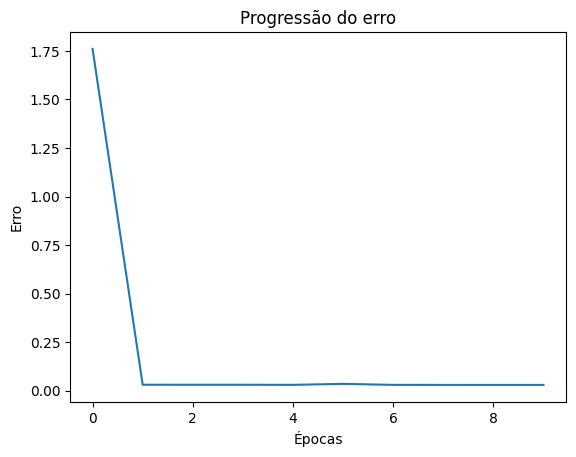

In [283]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [284]:
modelo.to_disk("modelo")

In [285]:
!zip -r /content/modelo.zip /content/modelo

  adding: content/modelo/ (stored 0%)
  adding: content/modelo/config.cfg (deflated 61%)
  adding: content/modelo/vocab/ (stored 0%)
  adding: content/modelo/vocab/strings.json (deflated 75%)
  adding: content/modelo/vocab/vectors (deflated 45%)
  adding: content/modelo/vocab/vectors.cfg (stored 0%)
  adding: content/modelo/vocab/key2row (stored 0%)
  adding: content/modelo/vocab/lookups.bin (stored 0%)
  adding: content/modelo/textcat/ (stored 0%)
  adding: content/modelo/textcat/cfg (deflated 28%)
  adding: content/modelo/textcat/model (deflated 59%)
  adding: content/modelo/tokenizer (deflated 84%)
  adding: content/modelo/meta.json (deflated 52%)


In [286]:
from google.colab import files
files.download("modelo.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Etapa 6: Testes com uma frase

In [287]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [288]:
texto_positivo = 'Parabéns pelo app!'

In [289]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'parabéns por o app'

In [290]:
previsao = modelo_carregado(texto_positivo)
previsao

parabéns por o app

In [291]:
previsao.cats

{'Negative': 5.274246746012068e-07,
 'Neutral': 7.311585951469026e-21,
 'Positive': 0.9999995231628418}

In [292]:
texto_negativo = 'Nao tem os dados... mds!!!!'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'Negative': 0.00025624182308092713,
 'Neutral': 7.756252745920369e-15,
 'Positive': 0.9997437596321106}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [293]:
previsoes = []
for texto in base_dados['Review']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [294]:
previsoes

[{'Negative': 7.751995099170017e-07,
  'Neutral': 1.3922984517044654e-20,
  'Positive': 0.9999991655349731},
 {'Negative': 1.02452850114787e-06,
  'Neutral': 1.8244334364560792e-19,
  'Positive': 0.999998927116394},
 {'Negative': 1.0524828439884004e-06,
  'Neutral': 2.7751979344518263e-19,
  'Positive': 0.999998927116394},
 {'Negative': 0.9999990463256836,
  'Neutral': 1.2123179793377403e-08,
  'Positive': 9.838336154643912e-07},
 {'Negative': 2.45130337361843e-07,
  'Neutral': 3.961481044615822e-21,
  'Positive': 0.9999997615814209},
 {'Negative': 9.245090950571466e-07,
  'Neutral': 1.5130281116694793e-19,
  'Positive': 0.9999990463256836},
 {'Negative': 0.9999998807907104,
  'Neutral': 9.09294695095042e-10,
  'Positive': 1.4023538597029983e-07},
 {'Negative': 0.9999998807907104,
  'Neutral': 1.959722606414971e-09,
  'Positive': 1.555423523313948e-07},
 {'Negative': 0.9999996423721313,
  'Neutral': 2.1230592839316387e-09,
  'Positive': 3.5135505527250643e-07},
 {'Negative': 3.25230246

In [295]:
previsoes_final = []
for previsao in previsoes:
  if previsao['Negative'] > previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Negative')
  elif previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Neutral')  
  else:
    previsoes_final.append('Positive')

previsoes_final = np.array(previsoes_final)

In [296]:
previsoes_final

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [297]:
respostas_reais = base_dados['Review'].values
respostas_reais

array(["the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado",
       "lately with every update the app gets Worse everytime that i want to Make payment i need to Confirm my identity the pig Savings money doesn't get interest anymore sincer the money need to stay one Month and every payment pick older money first the saving boxe canr only be withdrawn in business day horrible if you have an emergency outsidir ther and it is pushed emergency savings Loading time feel even longer With More Menu buttom and soft resets often during use",
       "i Haven't been Able to access the app it won't allow to switch from brazil to mexico i don't Speak portugué so that suck i've uninstalled and re-download several time since that 's what i Was told to de o by customer service didn't help",
       ...,
       'app controle cartão crédito fácil problema infelizmente demor liberar func

In [298]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.0

In [299]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Avaliação na base de teste

In [300]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [301]:
base_dados_teste = pd.read_csv('sentimentos.csv', encoding = 'utf-8')

In [302]:
base_dados_teste.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,"The app has improved significantly, sometimes ...",Joel Hernández,4,0,0,1,sentimentos
1,"Lately, with every update the app gets worse: ...",Lucas Santos,3,0,1,0,sentimentos
2,I haven't been able to access the App. It won'...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,I have 1 and a half years with this card and I...,Ramón Quijas,1,1,0,0,sentimentos
4,Very helpful app. The card arrived very fast a...,Emmanuelle Silva,5,0,0,1,sentimentos


In [303]:
base_dados_teste['Review'] = base_dados_teste['Review'].apply(preprocessamento)

In [304]:
base_dados_teste.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,the app has improved significantly sometime it...,Joel Hernández,4,0,0,1,sentimentos
1,lately with every update the app gets Worse ev...,Lucas Santos,3,0,1,0,sentimentos
2,i Haven't been Able to access the app it won't...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,i have and Half years With thi card and i have...,Ramón Quijas,1,1,0,0,sentimentos
4,very helpful app the card arrived very fast at...,Emmanuelle Silva,5,0,0,1,sentimentos


In [305]:
previsoes = []
for texto in base_dados_teste['Review']:
  texto = preprocessamento(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [306]:
previsoes_final = []
for previsao in previsoes:
  if previsao['Negative'] > previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Negative')
  elif previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Neutral')  
  else:
    previsoes_final.append('Positive')

previsoes_final = np.array(previsoes_final)

In [307]:
base_dados_teste

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,the app has improved significantly sometime it...,Joel Hernández,4,0,0,1,sentimentos
1,lately with every update the app gets Worse ev...,Lucas Santos,3,0,1,0,sentimentos
2,i Haven't been Able to access the app it won't...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,i have and Half years With thi card and i have...,Ramón Quijas,1,1,0,0,sentimentos
4,very helpful app the card arrived very fast at...,Emmanuelle Silva,5,0,0,1,sentimentos
...,...,...,...,...,...,...,...
7352,ideia original de o nubank simplificar existir...,Leandro C.,1,1,0,0,sentimentos
7353,peor cuar llegó uno los primero usuario en Sol...,Haguen Alferogh,1,1,0,0,sentimentos
7354,app controle cartão crédito fácil problema inf...,A Google user,4,0,0,1,sentimentos
7355,hoje dia so passo vergonha app funcionar quere...,Arthwr Ozaki,5,0,0,1,sentimentos


In [308]:
previsoes_final

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [309]:
def convert_ratings(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [310]:
respostas_reais = base_dados_teste['Rating'].apply(convert_ratings).values

In [311]:
respostas_reais

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [312]:
accuracy_score(respostas_reais, previsoes_final)

0.761859453581623

In [313]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[  24,    0, 1388],
       [   1,    0,  363],
       [   0,    0, 5581]])